# KNN Regressor

In [51]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [52]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [71]:
scaler = StandardScaler(with_mean=True, with_std=True)
knn = KNeighborsRegressor()

pipe = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

param_grid = {
    'knn__n_neighbors': np.arange(5, 40, 2)
}

knn_gscv = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39])},
             scoring='neg_mean_squared_error')

In [72]:
knn_gscv.best_params_

{'knn__n_neighbors': 13}

In [73]:
import matplotlib.pyplot as plt

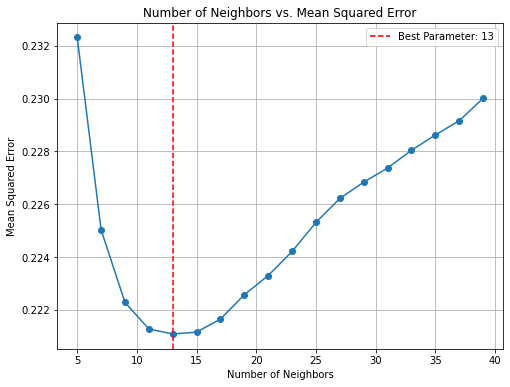

In [74]:
param_values = knn_gscv.cv_results_['param_knn__n_neighbors'].data
mean_squared_errors = -knn_gscv.cv_results_['mean_test_score']  

plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_squared_errors, marker='o', linestyle='-')

best_param = knn_gscv.best_params_['knn__n_neighbors']

plt.axvline(x=best_param, color='red', linestyle='--', label=f'Best Parameter: {best_param}')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Number of Neighbors vs. Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=knn_gscv.best_params_['knn__n_neighbors'])

knn_model.fit(X_train_scaled, y_train)

y_test_pred = knn_model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

0.2282538983042809
